# Exploring and preparing the data

## 1. BICIMAD. Details of the electric bicycle routes

### 1.1. Data presentation

#### 1.1.1. Movements of bycicles

**__id**: identificator of the movement

**user_day_code**: user code. For a same date, all the movement of the sale user have the same code.

**idunplug_station**: number of the origin station

**idunplug_base**: number of origin base

**idplug_station**: number of destination station

**idplug_base**: number of destionation base

**unplug_hourTime**: time the bicycle is picked up

**travel_time**: time in seconds of the ride

**track**: detail of the ride (GeoJSON)

**user_type**: type of user: 

    - 0: not defined
    - 1: anual user
    - 2: ocasional user
    - 3: worker of bicimad
    
**ageRange**: age range of the user:

    - 0: not defined
    - 1: between 0 and 16 years
    - 2: between 17 and 18 years
    - 3: between 19 and 26 years
    - 4: between 27 and 40 years
    - 5: between 41 and 65 years
    - 6: more than 65 years
    
**zip_code**: postal code of the user

### 1.2. Exploratory analysis

In [1]:
#libraries
import numpy as np
import pandas as pd
import json 
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
movements_january_19=pd.read_json('201901_Usage_Bicimad.json', lines=True)

In [13]:
movements_february_19=pd.read_json('201902_Usage_Bicimad.json', lines=True)


In [14]:
movements_march_19=pd.read_json('201903_Usage_Bicimad.json', lines=True)

In [15]:
movements_april_19=pd.read_json('201904_Usage_Bicimad.json', lines=True)


In [16]:
movements_may_19=pd.read_json('201905_Usage_Bicimad.json', lines=True)

In [17]:
movements_june_19=pd.read_json('201906_Usage_Bicimad.json', lines=True)


In [18]:
movements_july_19=pd.read_json('201907_movements.json', lines=True)


In [3]:
#We have one file per month, so we read all files and join them in a dataframe
#movements_january_19=pd.read_json('201901_Usage_Bicimad.json', lines=True)
#movements_february_19=pd.read_json('201902_Usage_Bicimad.json', lines=True)
#movements_march_19=pd.read_json('201903_Usage_Bicimad.json', lines=True)
#movements_april_19=pd.read_json('201904_Usage_Bicimad.json', lines=True)
#movements_may_19=pd.read_json('201905_Usage_Bicimad.json', lines=True)
#movements_june_19=pd.read_json('201906_Usage_Bicimad.json', lines=True)
#movements_july_19=pd.read_json('201907_movements.json', lines=True)
movements_august_19=pd.read_json('201908_movements.json', lines=True)
movements_september_19=pd.read_json('201909_movements.json', lines=True)
movements_october_19=pd.read_json('201910_movements.json', lines=True)
movements_november_19=pd.read_json('201911_movements.json', lines=True)
movements_december_19=pd.read_json('201912_movements.json', lines=True)
movements_january_20=pd.read_json('202001_movements.json', lines=True)
movements_february_20=pd.read_json('202002_movements.json', lines=True)
movements_march_20=pd.read_json('202003_movements.json', lines=True)
movements_april_20=pd.read_json('202004_movements.json', lines=True)
movements_may_20=pd.read_json('202005_movements.json', lines=True)
movements_june_20=pd.read_json('202006_movements.json', lines=True)
movements_july_20=pd.read_json('202007_movements.json', lines=True)
movements_august_20=pd.read_json('202008_movements.json', lines=True)
movements_september_20=pd.read_json('202009_movements.json', lines=True)
movements_october_20=pd.read_json('202010_movements.json', lines=True)
movements_november_20=pd.read_json('202011_movements.json', lines=True)
movements_december_20=pd.read_json('202012_movements.json', lines=True)
movements_january_21=pd.read_json('202101_movements.json', lines=True)
movements_february_21=pd.read_json('202102_movements.json', lines=True)
movements_march_21=pd.read_json('202103_movements.json', lines=True)
movements_april_21=pd.read_json('202104_movements.json', lines=True)
movements_may_21=pd.read_json('202105_movements.json', lines=True)
movements_june_21=pd.read_json('202106_movements.json', lines=True)

In [10]:
movements_january_19['unplug_hourTime'] = movements_january_19['unplug_hourTime'].str['$date']
movements_february_19['unplug_hourTime'] = movements_february_19['unplug_hourTime'].str['$date']
movements_march_19['unplug_hourTime'] = movements_march_19['unplug_hourTime'].str['$date']
movements_april_19['unplug_hourTime'] = movements_april_19['unplug_hourTime'].str['$date']
movements_may_19['unplug_hourTime'] = movements_may_19['unplug_hourTime'].str['$date']
movements_june_19['unplug_hourTime'] = movements_june_19['unplug_hourTime'].str['$date']





We make two different dataframes:
- movements: for data from july 2019 on where the column of unplug_hourTime is in timestamp UTC format
- movements_1: for data before july 2019 where the column of unplug_hourTime is in a dictionary

We are going to treat these columns separately and convert the column 'unplug_hourTime' into a datetime format ( datetime64[ns]), and then we merge the two dataframes

In [19]:
movements_1= movements_january_19.append(movements_february_19).append(movements_march_19).append(movements_april_19).append(movements_may_19).append(movements_june_19)

In [20]:
movements = movements_july_19.append(movements_august_19).append(movements_september_19).append(movements_october_19).append(movements_november_19).append(movements_december_19).append(movements_january_20).append(movements_february_20).append(movements_march_20).append(movements_april_20).append(movements_may_20).append(movements_june_20).append(movements_july_20).append(movements_august_20).append(movements_september_20).append(movements_october_20).append(movements_november_20).append(movements_december_20).append(movements_january_21).append(movements_february_21).append(movements_march_21).append(movements_april_21).append(movements_may_21).append(movements_june_21)

In [8]:
#!pip install iso8601
import iso8601
import datetime
import calendar

In [183]:
movements['idunplug_station'].unique()

array([  44,   57,   53,   56,  105,   91,    1,   29,   19,   16,  113,
        174,   42,   80,    3,  139,   66,  118,  131,  211,  164,   46,
        149,   59,  133,   35,   98,   67,  207,   64,   45,  166,  185,
        168,   71,  132,   86,   27,   21,   77,    7,   93,  162,   25,
         95,   38,  109,  114,  116,   62,  189,   75,  134,  183,  111,
         26,   17,   47,   43,  159,   90,   13,  135,   87,   20,  117,
         48,   83,    2,  110,    4,   41,  129,  175,   18,   49,   84,
         11,  171,   37,  179,    5,   36,    6,  137,  146,  147,   78,
        157,  145,    8,   12,   52,   54,  142,  152,   96,  136,   65,
         58,   82,   40,  158,  153,   30,   61,  161,   60,  138,  101,
         28,   74,  150,  128,  163,  124,  160,  213,   34,  125,  140,
        154,   10,   50,  201,   55,  184,  126,   81,  108,   31,  141,
        172,  122,  102,   33,   39,  173,   76,   85,   51,   97,  156,
        155,  169,   89,  104,  115,  148,   63,  1

In [62]:
#We obtain one column per importan feature of time 
movements['datetime'] = pd.to_datetime(movements['unplug_hourTime'])
movements['date'] = movements['datetime'].dt.date
movements['weekday'] = movements['datetime'].dt.day_name()
movements['hour'] = movements['datetime'].dt.hour
movements['month'] = movements['datetime'].dt.month
movements['year'] = movements['datetime'].dt.year
movements['day'] = movements['datetime'].dt.day
movements['time'] = movements['datetime'].dt.time
movements['datetime'] = movements['datetime'].dt.tz_localize(None)

In [30]:
movements['datetime']

0        2019-07-01 00:00:00
1        2019-07-01 00:00:00
2        2019-07-01 00:00:00
3        2019-07-01 00:00:00
4        2019-07-01 00:00:00
                 ...        
413365   2021-06-27 19:00:00
413366   2021-06-28 07:00:00
413367   2021-06-25 15:00:00
413368   2021-06-30 08:00:00
413369   2021-06-29 13:00:00
Name: datetime, Length: 7159891, dtype: datetime64[ns]

In [27]:
movements_1['unplug_hourTime'] = movements_1['unplug_hourTime'].str["$date"]

In [75]:
movements_1['datetime'] = pd.to_datetime(movements_1['unplug_hourTime'], utc=True)
movements_1['date'] = movements_1['datetime'].dt.date
movements_1['weekday'] = movements_1['datetime'].dt.day_name()
movements_1['hour'] = movements_1['datetime'].dt.hour
movements_1['month'] = movements_1['datetime'].dt.month
movements_1['year'] = movements_1['datetime'].dt.year
movements_1['day'] = movements_1['datetime'].dt.day
movements_1['time'] = movements_1['datetime'].dt.time
movements_1['datetime'] = movements_1['datetime'].dt.tz_localize(None)

In [77]:
movements = movements_1.append(movements)

In [78]:
movements

,_id,user_day_code,idplug_base,track,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station,unplug_hourTime,zip_code,datetime,date,weekday,hour,month,year,day,time
0,{'$oid': '5c4b07ea2f38432e007daab8'},b3b5b61509ab89afbf4d1e589d229bebe6637c2de819f5...,14,"{'type': 'FeatureCollection', 'features': [{'g...",1,23,162,82,0,83,2019-01-01T00:00:00.000+0100,,2018-12-31 23:00:00,2018-12-31,Monday,23,12,2018,31,23:00:00
1,{'$oid': '5c4b07ea2f38432e007daaba'},a18550d468153bb8e1808d4f0a85955579951832772996...,10,"{'type': 'FeatureCollection', 'features': [{'g...",1,1,415,133,5,36,2019-01-01T00:00:00.000+0100,28005,2018-12-31 23:00:00,2018-12-31,Monday,23,12,2018,31,23:00:00
2,{'$oid': '5c4b07ea2f38432e007daabb'},905737396c2fe343c84d62eaee3ab66e19632638c5bea7...,5,"{'type': 'FeatureCollection', 'features': [{'g...",1,3,545,25,0,90,2019-01-01T00:00:00.000+0100,,2018-12-31 23:00:00,2018-12-31,Monday,23,12,2018,31,23:00:00
3,{'$oid': '5c4b07ea2f38432e007daabd'},5922b4a1a2591161ebf1ad66f42f52cc7796f3754c2c76...,18,"{'type': 'FeatureCollection', 'features': [{'g...",1,6,417,105,3,155,2019-01-01T00:00:00.000+0100,28009,2018-12-31 23:00:00,2018-12-31,Monday,23,12,2018,31,23:00:00
4,{'$oid': '5c4b07ea2f38432e007daabe'},ed1c1a22c120e7d42cc522c33ab41db549791f3914b273...,4,"{'type': 'FeatureCollection', 'features': [{'g...",1,12,448,51,4,44,2019-01-01T00:00:00.000+0100,28005,2018-12-31 23:00:00,2018-12-31,Monday,23,12,2018,31,23:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413365,{'$oid': '60e4d2a51b91313ed4f52e62'},45de608bddfda3f468ef6093c65f6246a2917ce2376e98...,23,NaN,1,3,746,234,0,84,2021-06-27T19:00:00Z,,2021-06-27 19:00:00,2021-06-27,Sunday,19,6,2021,27,19:00:00
413366,{'$oid': '60e4d2b91b91313ed4f53f9f'},dbec6f034d41c528fd21412197518fe7d11dd0e863d965...,18,NaN,3,1,355190,268,0,268,2021-06-28T07:00:00Z,,2021-06-28 07:00:00,2021-06-28,Monday,7,6,2021,28,07:00:00
413367,{'$oid': '60e4d2d51b91313ed4f551ea'},2081c1c1c6c1d9e400b611bcb244b408da53884dffcbbf...,20,NaN,3,8,603181,253,5,253,2021-06-25T15:00:00Z,,2021-06-25 15:00:00,2021-06-25,Friday,15,6,2021,25,15:00:00
413368,{'$oid': '60e4d2d61b91313ed4f55226'},dbec6f034d41c528fd21412197518fe7d11dd0e863d965...,11,NaN,3,15,13,243,0,243,2021-06-30T08:00:00Z,,2021-06-30 08:00:00,2021-06-30,Wednesday,8,6,2021,30,08:00:00


In [79]:
#We are interested in predicting the demand, so we remove from the dataframe the movement of the workers of bicimad
movements = movements[movements['user_type'] != 3]

# We are going to remove the trips whose duration is less than 2 minutes and more than 4 hours, 
#considering that these trips are wrong in the table due to errors in the data collection.
movements['travel_time'] = movements['travel_time'] /60
movements = movements[(movements['travel_time']>=2) & (movements['travel_time'] < 240)]

<ipython-input-79-3bff8c030169>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movements['travel_time'] = movements['travel_time'] /60


In [80]:
movements.describe()

,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station,hour,month,year,day
count,8.699458e+06,8.699458e+06,8.699458e+06,8.699458e+06,8.699458e+06,8.699458e+06,8.699458e+06,8.699458e+06,8.699458e+06,8.699458e+06,8.699458e+06
mean,1.220692e+01,1.021962e+00,1.218650e+01,1.581371e+01,1.066268e+02,2.091058e+00,1.067113e+02,1.364879e+01,6.227503e+00,2.019787e+03,1.536785e+01
std,7.688101e+00,2.772272e-01,7.667379e+00,1.680103e+01,6.383153e+01,2.201334e+00,6.390684e+01,5.225519e+00,3.290883e+00,7.661950e-01,8.794786e+00
min,1.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,2.018000e+03,1.000000e+00
25%,5.000000e+00,1.000000e+00,5.000000e+00,8.033333e+00,5.200000e+01,0.000000e+00,5.200000e+01,1.000000e+01,3.000000e+00,2.019000e+03,8.000000e+00
50%,1.200000e+01,1.000000e+00,1.200000e+01,1.193333e+01,1.030000e+02,0.000000e+00,1.030000e+02,1.400000e+01,6.000000e+00,2.020000e+03,1.500000e+01
75%,1.900000e+01,1.000000e+00,1.900000e+01,1.753333e+01,1.610000e+02,4.000000e+00,1.610000e+02,1.800000e+01,9.000000e+00,2.020000e+03,2.300000e+01
max,3.000000e+01,7.000000e+00,3.000000e+01,2.399833e+02,2.008000e+03,6.000000e+00,2.009000e+03,2.300000e+01,1.200000e+01,2.021000e+03,3.100000e+01


Now we group the dataframe, because we are interested in obtaining the number of rides per hour

In [81]:

df_movements = movements.groupby(['date', 'weekday', 'hour', 'month', 'year', 'day', 'time','datetime'])._id.count().reset_index()

In [82]:
df_movements

,date,weekday,hour,month,year,day,time,datetime,_id
0,2018-12-31,Monday,23,12,2018,31,23:00:00,2018-12-31 23:00:00,176
1,2019-01-01,Tuesday,0,1,2019,1,00:00:00,2019-01-01 00:00:00,254
2,2019-01-01,Tuesday,1,1,2019,1,01:00:00,2019-01-01 01:00:00,169
3,2019-01-01,Tuesday,2,1,2019,1,02:00:00,2019-01-01 02:00:00,105
4,2019-01-01,Tuesday,3,1,2019,1,03:00:00,2019-01-01 03:00:00,83
...,...,...,...,...,...,...,...,...,...
20020,2021-06-30,Wednesday,19,6,2021,30,19:00:00,2021-06-30 19:00:00,813
20021,2021-06-30,Wednesday,20,6,2021,30,20:00:00,2021-06-30 20:00:00,552
20022,2021-06-30,Wednesday,21,6,2021,30,21:00:00,2021-06-30 21:00:00,571
20023,2021-06-30,Wednesday,22,6,2021,30,22:00:00,2021-06-30 22:00:00,499


##### Plot the evolution of total demand

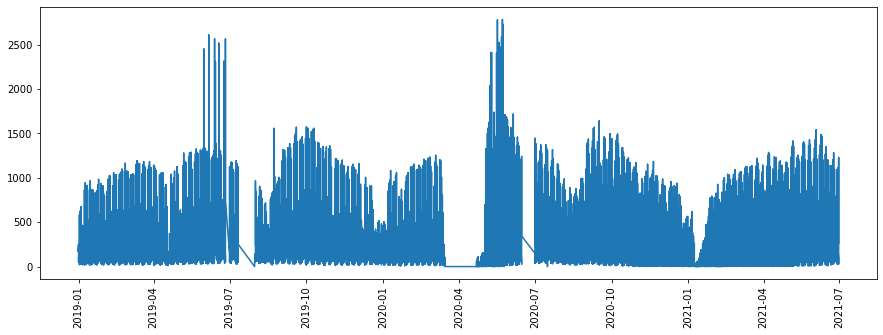

In [83]:
plt.figure(figsize=(15,5))

plt.plot(df_movements['date'], df_movements['_id'])
plt.xticks(rotation=90);

Conclusions of the plot:
- The demand of rides follows a temporal serie
- In january there are less rides than the rest of the year (could it be that the data is not good for that month?)
- We see that the demand rises with time , in may and june is higher, this can be influenciated by the weather
- The demand follows a patterns, depending of the day of the week
- Covid has affected the demand of bicicles

##### Evolution of demand in 2021

In [84]:
movements_2021 = df_movements[df_movements['year']==2021]

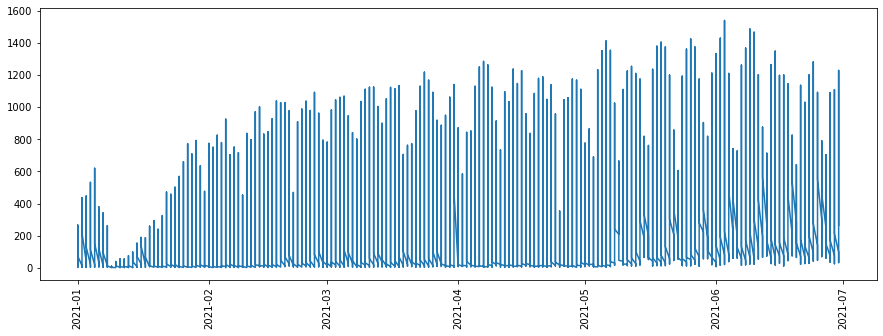

In [85]:
plt.figure(figsize=(15,5))

plt.plot(movements_2021['date'], movements_2021['_id'])
plt.xticks(rotation=90);

##### Evolution of demand in 2021 and month of june 

In [86]:
movements_2021_june = movements_2021[movements_2021['month']==6]

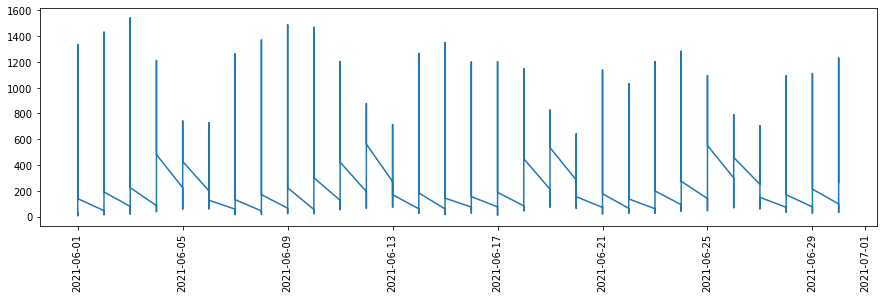

In [87]:
plt.figure(figsize=(15,
                   4))

plt.plot(movements_2021_june['date'], movements_2021_june['_id'])
plt.xticks(rotation=90);

##### Evolution of demand in 2021 and month of june and one day (for example 1st of july)


In [88]:
movements_one_day = movements_2021_june[movements_2021_june['day']==1]

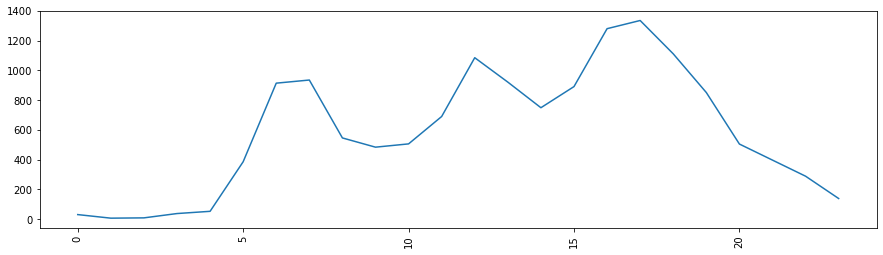

In [89]:
plt.figure(figsize=(15,
                   4))

plt.plot(movements_one_day['hour'], movements_one_day['_id'])
plt.xticks(rotation=90);

In [90]:
movements_january = df_movements[df_movements['month'] == 1]
movements_february = df_movements[df_movements['month'] == 2]
movements_march = df_movements[df_movements['month'] == 3]
movements_april = df_movements[df_movements['month'] == 4]
movements_may = df_movements[df_movements['month'] == 5]
movements_june = df_movements[df_movements['month'] == 6]
movements_july =  df_movements[df_movements['month'] == 7]
movements_august =  df_movements[df_movements['month'] == 8]
movements_september =  df_movements[df_movements['month'] == 9]
movements_october =  df_movements[df_movements['month'] == 10]
movements_november =  df_movements[df_movements['month'] == 11]
movements_december =  df_movements[df_movements['month'] == 12]



<AxesSubplot:xlabel='day', ylabel='_id'>

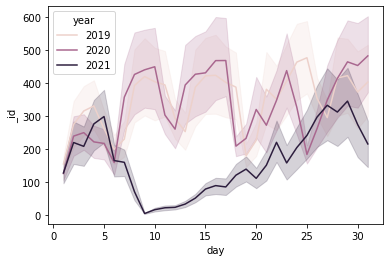

In [91]:
sns.lineplot(data = movements_january, x='day', y = '_id', hue='year')

AttributeError: 'AxesSubplot' object has no attribute 'lineplot'

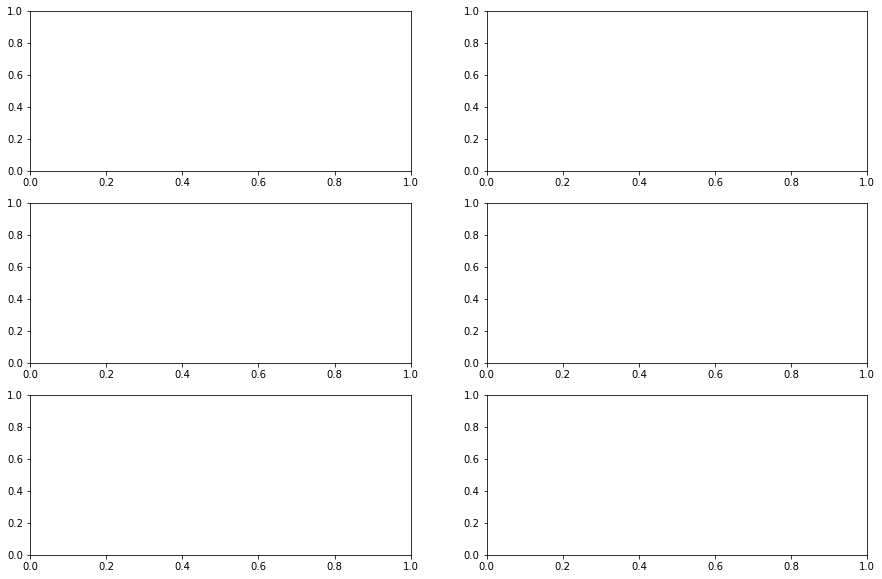

In [65]:
fig, ax = plt.subplots(3,2)
fig.set_size_inches(15,10)
ax[0,0].lineplot(data = movements_january, x='day', y = '_id', hue='year')
ax[0,1].plot(movements_february['day'], movements_february['_id'], label='February')
ax[1,0].plot(movements_march['day'], movements_march['_id'], label='March')
ax[1,1].plot(movements_april['day'], movements_april['_id'], label='April')
ax[2,0].plot(movements_may['day'], movements_may['_id'], label='May')
ax[2,1].plot(movements_june['day'], movements_june['_id'], label='June')




There are months, such as march and april, where the demand is quite similar around time (same variation) 

###### Some information per months

In [92]:
movements_by_month= movements.groupby(['month'])._id.count().reset_index()

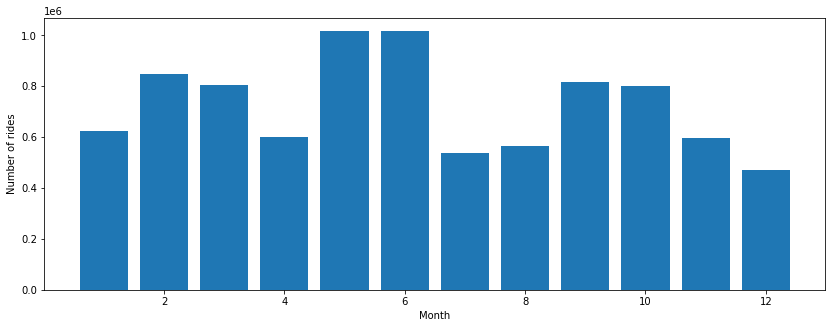

In [93]:
plt.figure(figsize=(14,5))
plt.bar(movements_by_month['month'], height =movements_by_month['_id']);
plt.xlabel("Month")
plt.ylabel("Number of rides");

##### Plots to understand the movements by day of week

In [94]:
df_movements

,date,weekday,hour,month,year,day,time,datetime,_id
0,2018-12-31,Monday,23,12,2018,31,23:00:00,2018-12-31 23:00:00,176
1,2019-01-01,Tuesday,0,1,2019,1,00:00:00,2019-01-01 00:00:00,254
2,2019-01-01,Tuesday,1,1,2019,1,01:00:00,2019-01-01 01:00:00,169
3,2019-01-01,Tuesday,2,1,2019,1,02:00:00,2019-01-01 02:00:00,105
4,2019-01-01,Tuesday,3,1,2019,1,03:00:00,2019-01-01 03:00:00,83
...,...,...,...,...,...,...,...,...,...
20020,2021-06-30,Wednesday,19,6,2021,30,19:00:00,2021-06-30 19:00:00,813
20021,2021-06-30,Wednesday,20,6,2021,30,20:00:00,2021-06-30 20:00:00,552
20022,2021-06-30,Wednesday,21,6,2021,30,21:00:00,2021-06-30 21:00:00,571
20023,2021-06-30,Wednesday,22,6,2021,30,22:00:00,2021-06-30 22:00:00,499


In [95]:
weekday_dic = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 
             'Thursday': 4, 'Friday': 5, 'Saturday': 6,
             'Sunday': 7}
weekdays = pd.DataFrame([[key, weekday_dic[key]] for key in weekday_dic.keys()], columns = ['weekday', 'number'])
weekdays

,weekday,number
0,Monday,1
1,Tuesday,2
2,Wednesday,3
3,Thursday,4
4,Friday,5
5,Saturday,6
6,Sunday,7


In [96]:
movements_by_day_of_week = df_movements.groupby(['weekday', 'month']).sum('_id').reset_index()
movements_by_day_of_week=movements_by_day_of_week.merge(weekdays, how='inner', left_on='weekday', right_on='weekday')
movements_by_day_of_week= movements_by_day_of_week.sort_values(by='number',ascending=True)

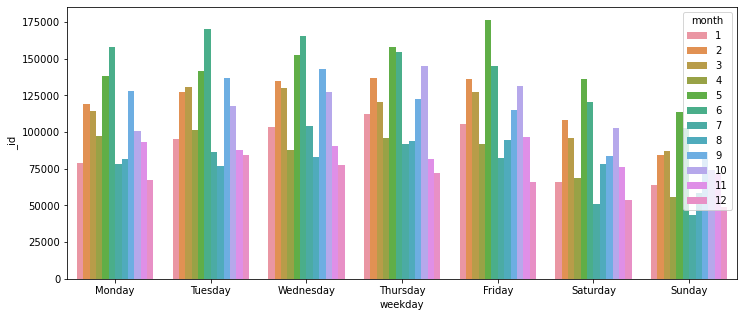

In [97]:
plt.figure(figsize=(12,5))
sns.barplot(x=movements_by_day_of_week['weekday'], y = movements_by_day_of_week['_id'], hue=movements_by_day_of_week['month']);


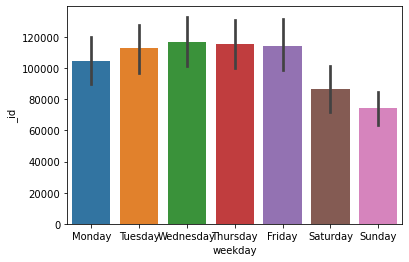

In [98]:
sns.barplot(x=movements_by_day_of_week['weekday'], y = movements_by_day_of_week['_id']);

Conclusions:
- From the plot we observate that the demand is higher in the laboral days, while in the weekend the demand is lower, this can be related with the usage of the service during trips to work

In [ ]:
#From the plot we observate that the demand is higher in the laboral days, while in the weekend the demand is lower

##### Plots to understand the movements by hour

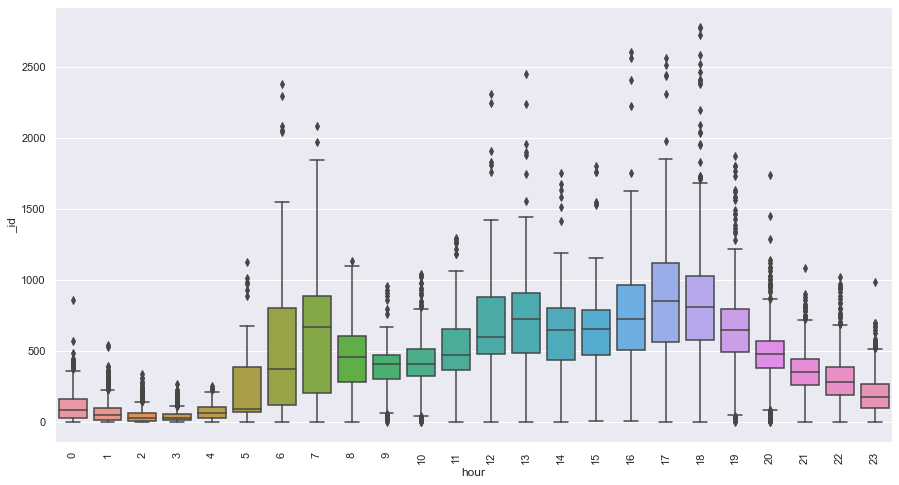

In [99]:
sns.set(rc = {'figure.figsize': (15,8)})
ax = sns.boxplot(x='hour', y = '_id', data = df_movements);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

Conclusions:
- The most popular hours to take the bike are 7 am (this could be related with the travel to work), and between 12 and 13 pm and between 17 and 18 pm

In [ ]:
## Pendiente: EVALUAR LAS HORAS POR DIAS DE LA SEMANA

#### Analyzing the travel time

<AxesSubplot:xlabel='weekday', ylabel='travel_time'>

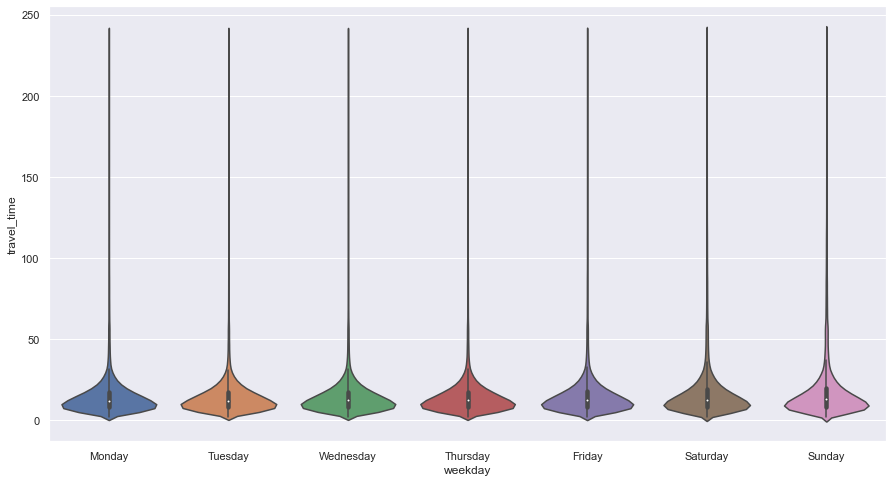

In [74]:
sns.violinplot(x=movements['weekday'], y = movements['travel_time'], data=movements)

In [ ]:
sns.set(rc = {'figure.figsize': (15,8)})
ax = sns.scatterplot(x='weekday', y = 'travel_time', data = movements, hue='ageRange', palette='bright');
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

<AxesSubplot:>

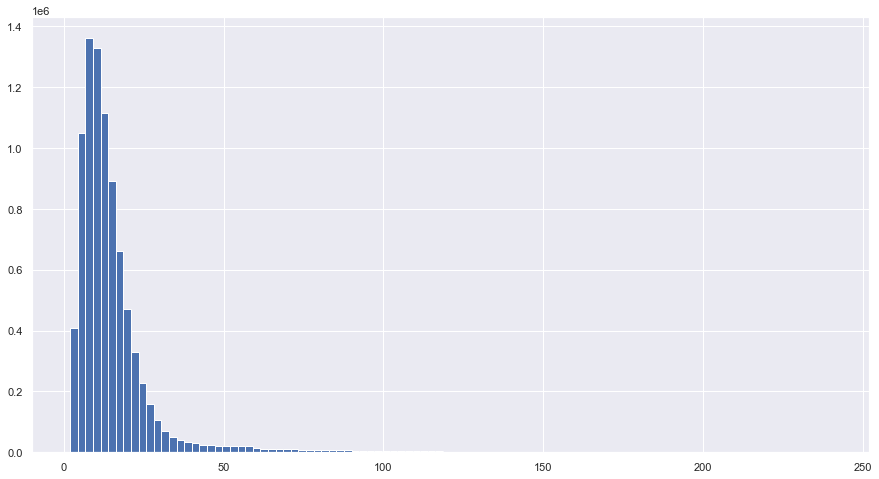

In [100]:
#Distribution of the rides by travel time (in minutes)
movements['travel_time'].hist(bins=100)

#### Analyzing data by age of the user

In [101]:
age_Range_dic = {0: 'not defined', 1: '0 - 16 years', 2: '17 - 18 years', 
             3: '19 - 26 years',4: '27 - 40 years', 5: '41 - 65 years',
             6: ' more 65 years'}

age_Range = pd.DataFrame([[key, age_Range_dic[key]] for key in age_Range_dic.keys()], columns = ['id', 'range'])
age_Range

,id,range
0,0,not defined
1,1,0 - 16 years
2,2,17 - 18 years
3,3,19 - 26 years
4,4,27 - 40 years
5,5,41 - 65 years
6,6,more 65 years


In [102]:
rides_per_age=movements.groupby('ageRange')['user_type'].count().reset_index()
rides_per_age=rides_per_age.merge(age_Range, how='inner', left_on='ageRange', right_on='id')

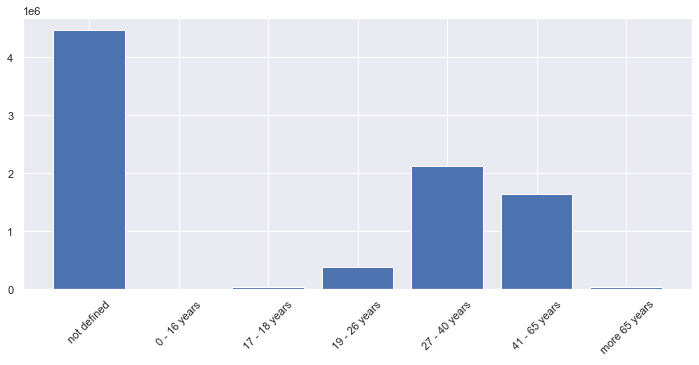

In [103]:
plt.figure(figsize=(12,5))
plt.bar(rides_per_age['range'], height = rides_per_age['user_type']);
plt.xticks(rotation=45);

We observate that in most of the data the age range is not defined, we are not going to eliminate these rows, so we could loss a lot of information

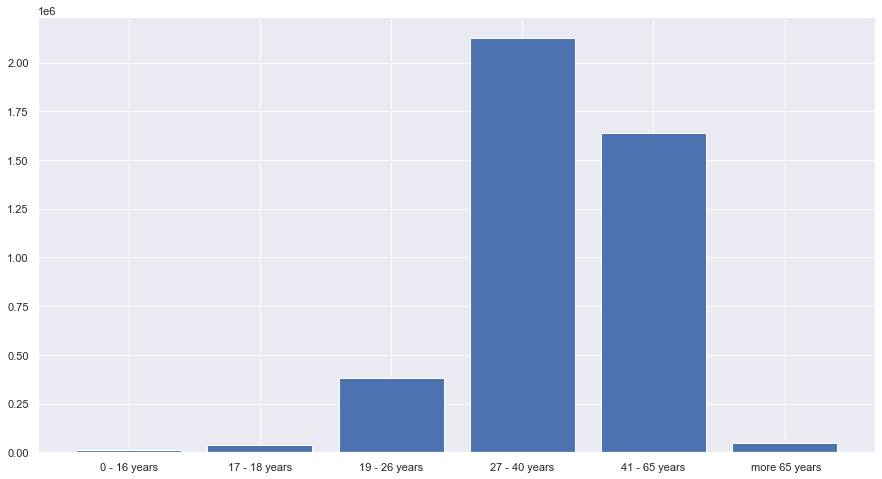

In [104]:
rides_per_age = rides_per_age[rides_per_age['ageRange']!= 0]
plt.bar(rides_per_age['range'], height = rides_per_age['user_type']);


Conclusions:
- The data of the column age Range is not well obtained, despite this, we know that people between 27 and 65 years are the principal users of the service
- This range is very high so we can not extract very useful information from here

 #### 1.1.2. Stations data

In the document 202106 we have information about the situation of the stations per day and hour, this file contains the following columns:

**id**: code of the base station

**latitude**: latitude of the station in WGS84 format

**longitude**: lenght of the station in WGS84 format

**name**: name of the station

**light**: ocupation of the station:

    - 0: low
    - 1: medium
    - 2: high
    - 3: inactive

**number**: logical designation of the Base Station

**activate**: active station
    - 0: not active
    - 1: active
    
**no_available**: station availability
    - 0: available
    - 1: unavailable

**total_bases**: number of bases of the station

**dock_bikes**: number of docked bicycles

**free_bases**: number of free bases

**reservations_count**: number of active reservations


We are going to use this data to get the name and coordinates of the stations

In [80]:
stations = pd.read_json('202106.json', lines=True)
stations.head()

,_id,stations
0,2021-06-01T00:43:39.688214,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
1,2021-06-01T01:43:41.872092,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
2,2021-06-01T02:43:42.969250,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
3,2021-06-01T03:43:44.600717,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
4,2021-06-01T04:43:45.629938,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."


We want to know the number of total bases available in each stations and the information about the latitude and longitude of them, so we can consider only the first row of the file, because the information we are looking for not depend of the hour and day

In [81]:
stations = stations['stations'][0]
stations = pd.DataFrame(stations)

In [82]:
stations.head()

,activate,name,reservations_count,light,total_bases,free_bases,number,longitude,no_available,address,latitude,dock_bikes,id
0,1,Puerta del Sol A,0,0,30,26,1a,-3.7018341,0,Puerta del Sol nº 1,40.4172137,3,1
1,1,Puerta del Sol B,0,0,30,28,1b,-3.701602938060457,0,Puerta del Sol nº 1,40.41731271011562,2,2
2,1,Miguel Moya,0,0,24,20,2,-3.7058415,0,Calle Miguel Moya nº 1,40.4205886,1,3
3,1,Plaza Conde Suchil,0,1,18,2,3,-3.7069171,0,Plaza del Conde del Valle de Súchil nº 3,40.4302937,12,4
4,1,Malasaña,0,2,24,15,4,-3.7025875,0,Calle Manuela Malasaña nº 5,40.4285524,7,5


In [83]:
stations = stations[['name', 'longitude', 'latitude', 'address', 'total_bases', 'id']]

##### Number of stations and location

There are 264 stations of bicimad, we are going to use the library folium to plot the locations on a map

In [172]:
stations

,name,longitude,latitude,address,total_bases,id
0,Puerta del Sol A,-3.701834,40.417214,Puerta del Sol nº 1,30,1
1,Puerta del Sol B,-3.701603,40.417313,Puerta del Sol nº 1,30,2
2,Miguel Moya,-3.705842,40.420589,Calle Miguel Moya nº 1,24,3
3,Plaza Conde Suchil,-3.706917,40.430294,Plaza del Conde del Valle de Súchil nº 3,18,4
4,Malasaña,-3.702587,40.428552,Calle Manuela Malasaña nº 5,24,5
...,...,...,...,...,...,...
259,INEF,-3.729970,40.438960,Avenida Juan de Herrera frente a la calle Paul...,24,265
260,Ciudad Universitaria 1,-3.726990,40.443750,Avenida de la Complutense (Metro Ciudad Univer...,24,266
261,Ciudad Universitaria 2,-3.726930,40.443420,Avenida de la Complutense (Metro Ciudad Univer...,24,267
262,Facultad Biología,-3.727310,40.449120,Calle José Antonio Novais frente al nº 12,24,268


In [182]:
stations_grouped = stations.groupby('address').sum().reset_index()
stations_grouped

,address,longitude,latitude,total_bases,id
0,Avenida Bruselas nº 56,-3.663010,40.438650,24,250
1,Avenida Complutense nº 23,-3.729370,40.451090,24,269
2,Avenida Juan de Herrera frente a la calle Paul...,-3.729970,40.438960,24,265
3,Avenida Marqués de Corbera nº 12,-3.655555,40.422962,24,241
4,Avenida Marqués de Corbera nº 52,-3.651035,40.426207,24,242
...,...,...,...,...,...
252,Plaza del Conde del Valle de Súchil nº 3,-3.706917,40.430294,18,4
253,Plaza del Cordón,-3.710329,40.414193,24,39
254,Puerta del Sol nº 1,-7.403437,80.834526,60,3
255,Ronda de Atocha nº 2,-3.693520,40.407561,27,55


In [180]:
stations_grouped[stations_grouped['latitude']!=1]

,name,longitude,latitude,total_bases,id
address,,,,,
Avenida de la Complutense (Metro Ciudad Universitaria),2,2,2,2,2
Calle Arcipreste de Hita nº 12,2,2,2,2,2
Calle Princesa nº 5,2,2,2,2,2
Calle Serrano nº 34,2,2,2,2,2
Paseo de la Infanta Isabel nº 3,2,2,2,2,2
Plaza de Celenque nº 1,2,2,2,2,2
Puerta del Sol nº 1,2,2,2,2,2


In [84]:
stations.describe()

,total_bases,id
count,264.000000,264.000000
mean,23.920455,136.829545
std,1.877756,77.475946
min,12.000000,1.000000
25%,24.000000,71.750000
50%,24.000000,137.500000
75%,24.000000,203.250000
max,30.000000,270.000000


In [85]:
#!pip install folium
import folium

In [168]:
stations['longitude'] = stations['longitude'].astype('float')
stations['latitude'] = stations['latitude'].astype('float')

In [169]:
#we create a map with the location of interest (Madrid)
bike_stations = folium.Map(location=[stations.latitude.mean(), 
                           stations.longitude.mean()],
                 zoom_start=14, control_scale=True)

In [170]:
for index, location_info in stations.iterrows():
    folium.Marker([location_info["latitude"], location_info["longitude"]], 
                  popup=location_info["name"]).add_to(bike_stations)

In [89]:
bike_stations

##### Number of rides per station (origin station)

In [90]:
rides_origin = movements.merge(stations, how='inner', left_on='idunplug_station', right_on='id')

In [91]:
rides_origin = rides_origin.groupby('id')['_id'].count()

In [92]:
rides_origin = rides_origin.reset_index()

In [93]:
rides_origin = rides_origin.merge(stations, how = 'inner', right_on= 'id', left_on='id')

In [94]:
rides_origin

,id,_id,name,longitude,latitude,address,total_bases
0,1,32107,Puerta del Sol A,-3.701834,40.417214,Puerta del Sol nº 1,30
1,2,12424,Puerta del Sol B,-3.701603,40.417313,Puerta del Sol nº 1,30
2,3,33642,Miguel Moya,-3.705842,40.420589,Calle Miguel Moya nº 1,24
3,4,27892,Plaza Conde Suchil,-3.706917,40.430294,Plaza del Conde del Valle de Súchil nº 3,18
4,5,22718,Malasaña,-3.702587,40.428552,Calle Manuela Malasaña nº 5,24
...,...,...,...,...,...,...,...
259,266,788,Ciudad Universitaria 1,-3.726990,40.443750,Avenida de la Complutense (Metro Ciudad Univer...,24
260,267,1958,Ciudad Universitaria 2,-3.726930,40.443420,Avenida de la Complutense (Metro Ciudad Univer...,24
261,268,2757,Facultad Biología,-3.727310,40.449120,Calle José Antonio Novais frente al nº 12,24
262,269,2521,Facultad Derecho,-3.729370,40.451090,Avenida Complutense nº 23,24


In [95]:
#Now we have a dataframe with the number of rides per station, we can evaluate which stations have the most rides

In [96]:
rides_origin = rides_origin.sort_values(by='_id', ascending=False)

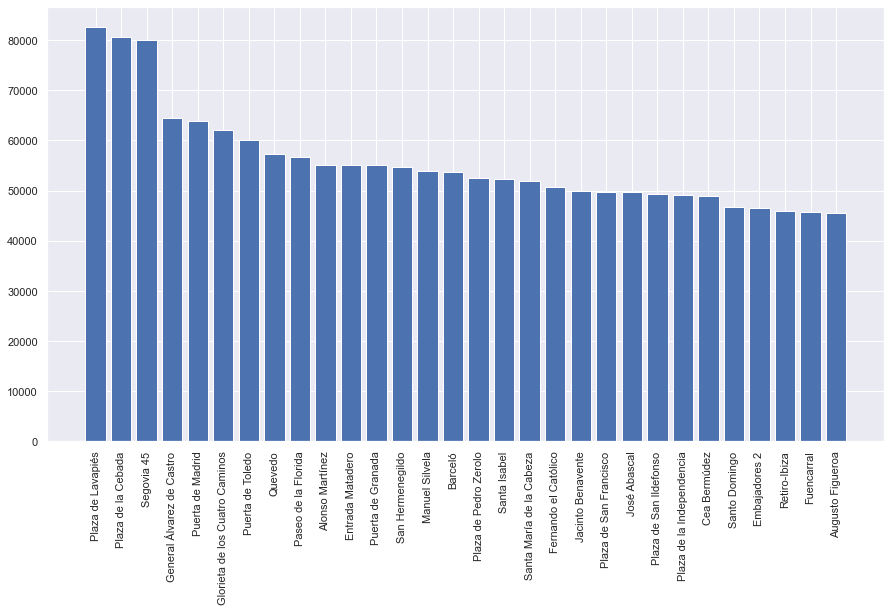

In [97]:
#plot: 30 stations with the most
rides_origin = rides_origin.head(30)
plt.figure(figsize=(15,8))
plt.bar(rides_origin['name'], height = rides_origin['_id']);
plt.xticks(rotation=90);

##### Number of rides per station (destination station)

In [98]:
rides_destination = movements.merge(stations, how='inner', left_on='idplug_station', right_on='id')

In [99]:
rides_destination = rides_destination.groupby('id')['_id'].count()
rides_destination = rides_destination.reset_index()
rides_destination = rides_destination.merge(stations, how = 'inner', right_on= 'id', left_on='id')
rides_destination = rides_destination.sort_values(by='_id', ascending=False)

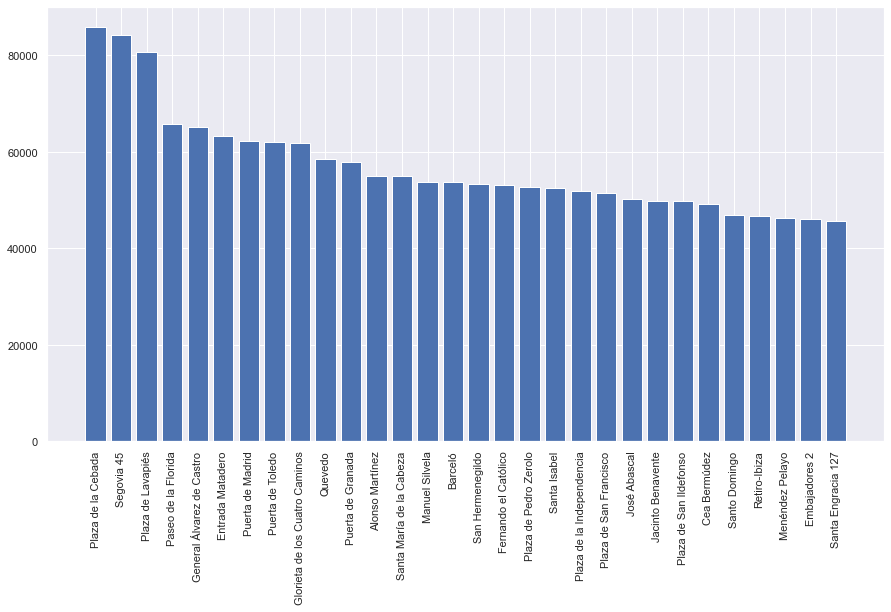

In [100]:
#plot: 30 stations with the most
rides_destination = rides_destination.head(30)
plt.figure(figsize=(15,8))
plt.bar(rides_destination['name'], height = rides_destination['_id']);
plt.xticks(rotation=90);

Comparing both charts, we can see that the most popular stations for picking a bike are the same that those for leaving the bike

#### 1.1.3.Adding useful information to the dataframe

We are going to add useful information for the predictive models. One of the important is the type of day (holiday, working day, weekend).

We use a dataframe obtained from the open data portal of the community of madrid.

In [105]:
holidays_df = pd.read_csv('calendario.csv', sep=';', names=(['day', 'day_week', 'holiday', 'type', 'festivity']))
holidays_df.holiday.unique()

array(['laborable / festivo / domingo festivo', 'festivo', 'laborable',
       'sábado', 'domingo', nan, 'Festivo'], dtype=object)

In [106]:
#We are only interested in knowing the holidays
holidays_df = holidays_df[holidays_df['holiday']=='festivo']

In [107]:
holidays_df['date'] = pd.to_datetime(holidays_df['day'], dayfirst=True)
holidays_df


,day,day_week,holiday,type,festivity,date
1,01/01/2013,martes,festivo,Festivo nacional,Año Nuevo,2013-01-01
7,07/01/2013,lunes,festivo,Festivo nacional,Traslado Epifanía del Señor,2013-01-07
77,18/03/2013,lunes,festivo,Festivo de la Comunidad de Madrid,Traslado San Jose,2013-03-18
87,28/03/2013,jueves,festivo,Festivo de la comunidad de Madrid,Jueves Santo,2013-03-28
88,29/03/2013,viernes,festivo,Festivo nacional,Viernes Santo,2013-03-29
...,...,...,...,...,...,...
2549,25/12/2019,miércoles,festivo,Festivo nacional,Natividad del Señor,2019-12-25
2556,01/01/2020,miércoles,festivo,Festivo nacional,Año Nuevo,2020-01-01
2561,06/01/2020,lunes,festivo,Festivo nacional,Epifanía del Señor,2020-01-06
2922,01/01/2021,viernes,festivo,Festivo nacional,Año Nuevo,2021-01-01


In [111]:
df_movements

,date,weekday,hour,month,year,day,time,datetime,_id
0,2018-12-31,Monday,23,12,2018,31,23:00:00,2018-12-31 23:00:00,176
1,2019-01-01,Tuesday,0,1,2019,1,00:00:00,2019-01-01 00:00:00,254
2,2019-01-01,Tuesday,1,1,2019,1,01:00:00,2019-01-01 01:00:00,169
3,2019-01-01,Tuesday,2,1,2019,1,02:00:00,2019-01-01 02:00:00,105
4,2019-01-01,Tuesday,3,1,2019,1,03:00:00,2019-01-01 03:00:00,83
...,...,...,...,...,...,...,...,...,...
20020,2021-06-30,Wednesday,19,6,2021,30,19:00:00,2021-06-30 19:00:00,813
20021,2021-06-30,Wednesday,20,6,2021,30,20:00:00,2021-06-30 20:00:00,552
20022,2021-06-30,Wednesday,21,6,2021,30,21:00:00,2021-06-30 21:00:00,571
20023,2021-06-30,Wednesday,22,6,2021,30,22:00:00,2021-06-30 22:00:00,499


In [118]:
df_movements['date'] = df_movements.date.astype('datetime64[ns]')


In [119]:
holidays_df['date']=holidays_df.date.astype('datetime64[ns]')

In [120]:
movements_final = df_movements.merge(holidays_df, how='left', on= 'date')

In [121]:
movements_final

,date,weekday,hour,month,year,day_x,time,datetime,_id,day_y,day_week,holiday,type,festivity
0,2018-12-31,Monday,23,12,2018,31,23:00:00,2018-12-31 23:00:00,176,NaN,NaN,NaN,NaN,NaN
1,2019-01-01,Tuesday,0,1,2019,1,00:00:00,2019-01-01 00:00:00,254,01/01/2019,martes,festivo,Festivo nacional,Año Nuevo
2,2019-01-01,Tuesday,1,1,2019,1,01:00:00,2019-01-01 01:00:00,169,01/01/2019,martes,festivo,Festivo nacional,Año Nuevo
3,2019-01-01,Tuesday,2,1,2019,1,02:00:00,2019-01-01 02:00:00,105,01/01/2019,martes,festivo,Festivo nacional,Año Nuevo
4,2019-01-01,Tuesday,3,1,2019,1,03:00:00,2019-01-01 03:00:00,83,01/01/2019,martes,festivo,Festivo nacional,Año Nuevo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20020,2021-06-30,Wednesday,19,6,2021,30,19:00:00,2021-06-30 19:00:00,813,NaN,NaN,NaN,NaN,NaN
20021,2021-06-30,Wednesday,20,6,2021,30,20:00:00,2021-06-30 20:00:00,552,NaN,NaN,NaN,NaN,NaN
20022,2021-06-30,Wednesday,21,6,2021,30,21:00:00,2021-06-30 21:00:00,571,NaN,NaN,NaN,NaN,NaN
20023,2021-06-30,Wednesday,22,6,2021,30,22:00:00,2021-06-30 22:00:00,499,NaN,NaN,NaN,NaN,NaN


In [122]:
movements_final = movements_final[['date', 'weekday', 'hour', 'time', 'month', '_id', 'holiday', 'datetime']]

In [123]:
movements_final

,date,weekday,hour,time,month,_id,holiday,datetime
0,2018-12-31,Monday,23,23:00:00,12,176,NaN,2018-12-31 23:00:00
1,2019-01-01,Tuesday,0,00:00:00,1,254,festivo,2019-01-01 00:00:00
2,2019-01-01,Tuesday,1,01:00:00,1,169,festivo,2019-01-01 01:00:00
3,2019-01-01,Tuesday,2,02:00:00,1,105,festivo,2019-01-01 02:00:00
4,2019-01-01,Tuesday,3,03:00:00,1,83,festivo,2019-01-01 03:00:00
...,...,...,...,...,...,...,...,...
20020,2021-06-30,Wednesday,19,19:00:00,6,813,NaN,2021-06-30 19:00:00
20021,2021-06-30,Wednesday,20,20:00:00,6,552,NaN,2021-06-30 20:00:00
20022,2021-06-30,Wednesday,21,21:00:00,6,571,NaN,2021-06-30 21:00:00
20023,2021-06-30,Wednesday,22,22:00:00,6,499,NaN,2021-06-30 22:00:00


In [124]:
movements_final.fillna("no festivo", inplace=True)

C:\Users\paula\Anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [125]:
dic_holidays = {'no festivo': 0, 'festivo': 1}

In [126]:
dic_holidays

{'no festivo': 0, 'festivo': 1}

In [127]:
holidays_df = pd.DataFrame([[key, dic_holidays[key]] for key in dic_holidays.keys()], columns = ['holiday', 'is_holiday'])
holidays_df

,holiday,is_holiday
0,no festivo,0
1,festivo,1


In [128]:
movements_final=movements_final.merge(holidays_df, how='inner', left_on='holiday', right_on='holiday')

In [130]:
movements_final

,date,weekday,hour,time,month,_id,holiday,datetime,is_holiday
0,2018-12-31,Monday,23,23:00:00,12,176,no festivo,2018-12-31 23:00:00,0
1,2019-01-02,Wednesday,0,00:00:00,1,52,no festivo,2019-01-02 00:00:00,0
2,2019-01-02,Wednesday,1,01:00:00,1,29,no festivo,2019-01-02 01:00:00,0
3,2019-01-02,Wednesday,2,02:00:00,1,32,no festivo,2019-01-02 02:00:00,0
4,2019-01-02,Wednesday,3,03:00:00,1,23,no festivo,2019-01-02 03:00:00,0
...,...,...,...,...,...,...,...,...,...
20020,2021-01-06,Wednesday,19,19:00:00,1,277,festivo,2021-01-06 19:00:00,1
20021,2021-01-06,Wednesday,20,20:00:00,1,219,festivo,2021-01-06 20:00:00,1
20022,2021-01-06,Wednesday,21,21:00:00,1,191,festivo,2021-01-06 21:00:00,1
20023,2021-01-06,Wednesday,22,22:00:00,1,212,festivo,2021-01-06 22:00:00,1


In [131]:
movements_final = movements_final[['date', 'weekday', 'hour', 'time', 'month', '_id', 'is_holiday', 'datetime']]

In [132]:
movements_final['rides'] = movements_final['_id']
movements_final.drop(['_id'], axis=1, inplace=True)
movements_final

,date,weekday,hour,time,month,is_holiday,datetime,rides
0,2018-12-31,Monday,23,23:00:00,12,0,2018-12-31 23:00:00,176
1,2019-01-02,Wednesday,0,00:00:00,1,0,2019-01-02 00:00:00,52
2,2019-01-02,Wednesday,1,01:00:00,1,0,2019-01-02 01:00:00,29
3,2019-01-02,Wednesday,2,02:00:00,1,0,2019-01-02 02:00:00,32
4,2019-01-02,Wednesday,3,03:00:00,1,0,2019-01-02 03:00:00,23
...,...,...,...,...,...,...,...,...
20020,2021-01-06,Wednesday,19,19:00:00,1,1,2021-01-06 19:00:00,277
20021,2021-01-06,Wednesday,20,20:00:00,1,1,2021-01-06 20:00:00,219
20022,2021-01-06,Wednesday,21,21:00:00,1,1,2021-01-06 21:00:00,191
20023,2021-01-06,Wednesday,22,22:00:00,1,1,2021-01-06 22:00:00,212


In [133]:
#We create a csv grouped by hour and date, this is the dataframe we are going to use to predict the demand in our temporal series model
movements_final.to_csv('movements_grouped.csv')